# Project 2
# CP-318 Data Science for Smart City Applications  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import folium
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score




from scipy.stats import norm, anderson

In [2]:
# loading dataset of smartcity Pune
df = pd.read_csv(r"Pune_SmartCity_Test_Dataset.csv")

# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103205 entries, 0 to 103204
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NAME                103205 non-null  object 
 1   HUMIDITY            98084 non-null   float64
 2   LIGHT               97133 non-null   float64
 3   NO_MAX              103205 non-null  int64  
 4   NO_MIN              103205 non-null  int64  
 5   NO2_MAX             102628 non-null  float64
 6   NO2_MIN             102628 non-null  float64
 7   OZONE_MAX           102597 non-null  float64
 8   OZONE_MIN           102597 non-null  float64
 9   PM10_MAX            99972 non-null   float64
 10  PM10_MIN            99972 non-null   float64
 11  PM2_MAX             99972 non-null   float64
 12  PM2_MIN             99972 non-null   float64
 13  SO2_MAX             102368 non-null  float64
 14  SO2_MIN             102368 non-null  float64
 15  CO_MAX              102597 non-nul

In [4]:
# chaging datatype of "LASTUPDATEDATETIME" into "to_datetime" datatype
df['LASTUPDATEDATETIME'] = pd.to_datetime(df['LASTUPDATEDATETIME']) 

C:\Users\ashha\AppData\Local\Temp\ipykernel_6680\2619537988.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LASTUPDATEDATETIME'] = pd.to_datetime(df['LASTUPDATEDATETIME'])


In [5]:
df.describe()

HUMIDITY         LIGHT    NO_MAX    NO_MIN        NO2_MAX  \
count  98084.000000  97133.000000  103205.0  103205.0  102628.000000   
mean      63.130559   1894.563277       0.0       0.0      72.677184   
min       10.166000      0.094000       0.0       0.0       0.000000   
25%       48.056000      2.243000       0.0       0.0      47.000000   
50%       68.196000    123.227000       0.0       0.0      77.000000   
75%       81.099250   1879.022000       0.0       0.0      96.000000   
max       97.359000  64811.321000       0.0       0.0     316.000000   
std       21.787184   5315.903216       0.0       0.0      37.689305   

             NO2_MIN      OZONE_MAX      OZONE_MIN      PM10_MAX  \
count  102628.000000  102597.000000  102597.000000  99972.000000   
mean       62.799830      16.646715       4.961899     19.004841   
min         0.000000       0.000000       0.000000      0.000000   
25%        37.000000       0.000000       0.000000      8.000000   
50%        64.000000       6.000000       0.000000     18.000000   
75%        87.000000      23.000000       0.000000     29.000000   
max       315.000000     335.000000     335.000000     54.000000   
std        33.607416      28.367278      20.427678     12.492682   

           PM10_MIN  ...        CO2_MIN         SOUND  TEMPRATURE_MAX  \
count  99972.000000  ...  101640.000000  9.808500e+04    98144.000000   
mean      14.559357  ...     137.317011  1.535118e+02       33.920219   
min        0.000000  ...       0.000000  5.620900e+01       23.000000   
25%        5.000000  ...       0.000000  6.482400e+01       29.000000   
50%       13.000000  ...      29.000000  7.089400e+01       34.000000   
75%       23.000000  ...     296.000000  7.610800e+01       39.000000   
max       48.000000  ...     919.000000  2.027663e+06       46.000000   
std       10.961672  ...     176.908786  1.294800e+04        5.264997   

       TEMPRATURE_MIN        UV_MAX        UV_MIN  AIR_PRESSURE  \
count    98144.000000  90687.000000  90687.000000  98085.000000   
mean        24.910560      1.093322      0.086700      0.930735   
min         20.000000      0.000000      0.000000      0.763000   
25%         24.000000      0.000000      0.000000      0.928000   
50%         25.000000      0.400000      0.100000      0.931000   
75%         26.000000      1.700000      0.100000      0.933000   
max         44.000000      6.600000      1.300000      1.349000   
std          2.046729      1.487220      0.098301      0.021908   

                  LASTUPDATEDATETIME      Lattitude      Longitude  
count                         103205  103205.000000  103205.000000  
mean   2019-06-24 02:21:44.639116288      18.502812      73.849098  
min              2019-01-05 00:01:00      18.451716      73.792927  
25%              2019-05-06 09:31:00      18.487306      73.824393  
50%              2019-06-22 20:15:00      18.501834      73.828656  
75%              2019-08-14 05:34:00      18.525066      73.858092  
max              2019-12-08 23:49:00      18.559427      73.941478  
std                              NaN       0.027027       0.043198  

[8 rows x 27 columns]

In [6]:
df["NO_MIN"].unique(), df["NO_MAX"].unique()

(array([0], dtype=int64), array([0], dtype=int64))

NO_MIN and NO_MAX column are only containing entries value "0" of int64 datatype. So these columns of feature is dropped

In [7]:
df = df.drop(['NO_MAX', 'NO_MIN'], axis=1)

## Missing Values and Outlier

**computing the percentage of missing data in each column (feature)**

In [8]:
# computing percentage of nan entry in each column of features
percentage_missing= df.isnull().sum()*100/len(df) 
percentage_missing

NAME                   0.000000
HUMIDITY               4.961969
LIGHT                  5.883436
NO2_MAX                0.559081
NO2_MIN                0.559081
OZONE_MAX              0.589119
OZONE_MIN              0.589119
PM10_MAX               3.132600
PM10_MIN               3.132600
PM2_MAX                3.132600
PM2_MIN                3.132600
SO2_MAX                0.811007
SO2_MIN                0.811007
CO_MAX                 0.589119
CO_MIN                 0.589119
CO2_MAX                1.516399
CO2_MIN                1.516399
SOUND                  4.961000
TEMPRATURE_MAX         4.903832
TEMPRATURE_MIN         4.903832
UV_MAX                12.129257
UV_MIN                12.129257
AIR_PRESSURE           4.961000
LASTUPDATEDATETIME     0.000000
Lattitude              0.000000
Longitude              0.000000
dtype: float64

There is no substantial amount of missing entry in any column so we will fill the missing value.  


In [9]:
# Location name in Pune smart city and there corresponding Lattitudes and Longitudes.

print(f"\n\Location: {df['NAME'].unique()} \n total no. of unique entries {np.size(df['NAME'].unique())}")

print(f"\n\nLattitudes: {df['Lattitude'].unique()} \n total no. of unique entries {np.size(df['Lattitude'].unique())}")

print(f"\n\nLongitude: {df['Longitude'].unique()} \n total no. of unique entries {np.size(df['Longitude'].unique())}")


\Location: ['BopadiSquare_65' 'Karve Statue Square_5' 'Lullanagar_Square_14'
 'Hadapsar_Gadital_01' 'PMPML_Bus_Depot_Deccan_15'
 'Goodluck Square_Cafe_23' 'Chitale Bandhu Corner_41'
 'Pune Railway Station_28' 'Rajashri_Shahu_Bus_stand_19'
 'Dr Baba Saheb Ambedkar Sethu Junction_60'] 
 total no. of unique entries 10


Lattitudes: [18.5594267 18.5017272 18.4873065 18.5018335 18.4517156 18.5343565
 18.51557   18.5250661 18.4822385 18.5517635] 
 total no. of unique entries 10


Longitude: [73.8286556 73.8135954 73.8856497 73.9414776 73.8561703 73.8260579
 73.8243931 73.7929274 73.8580916 73.8306479] 
 total no. of unique entries 10


In [10]:
print("Location: \tnumber of entries")
for location in df["NAME"].unique():
    df_location = df.loc[df.NAME == location]
    print(f"{location}: {df_location.shape}")

Location: 	number of entries
BopadiSquare_65: (4279, 26)
Karve Statue Square_5: (11766, 26)
Lullanagar_Square_14: (12117, 26)
Hadapsar_Gadital_01: (12434, 26)
PMPML_Bus_Depot_Deccan_15: (12210, 26)
Goodluck Square_Cafe_23: (12963, 26)
Chitale Bandhu Corner_41: (12872, 26)
Pune Railway Station_28: (11791, 26)
Rajashri_Shahu_Bus_stand_19: (12461, 26)
Dr Baba Saheb Ambedkar Sethu Junction_60: (312, 26)


#### Histogram plot of one location (df_BopadiSquare_65) in Pune smart city 

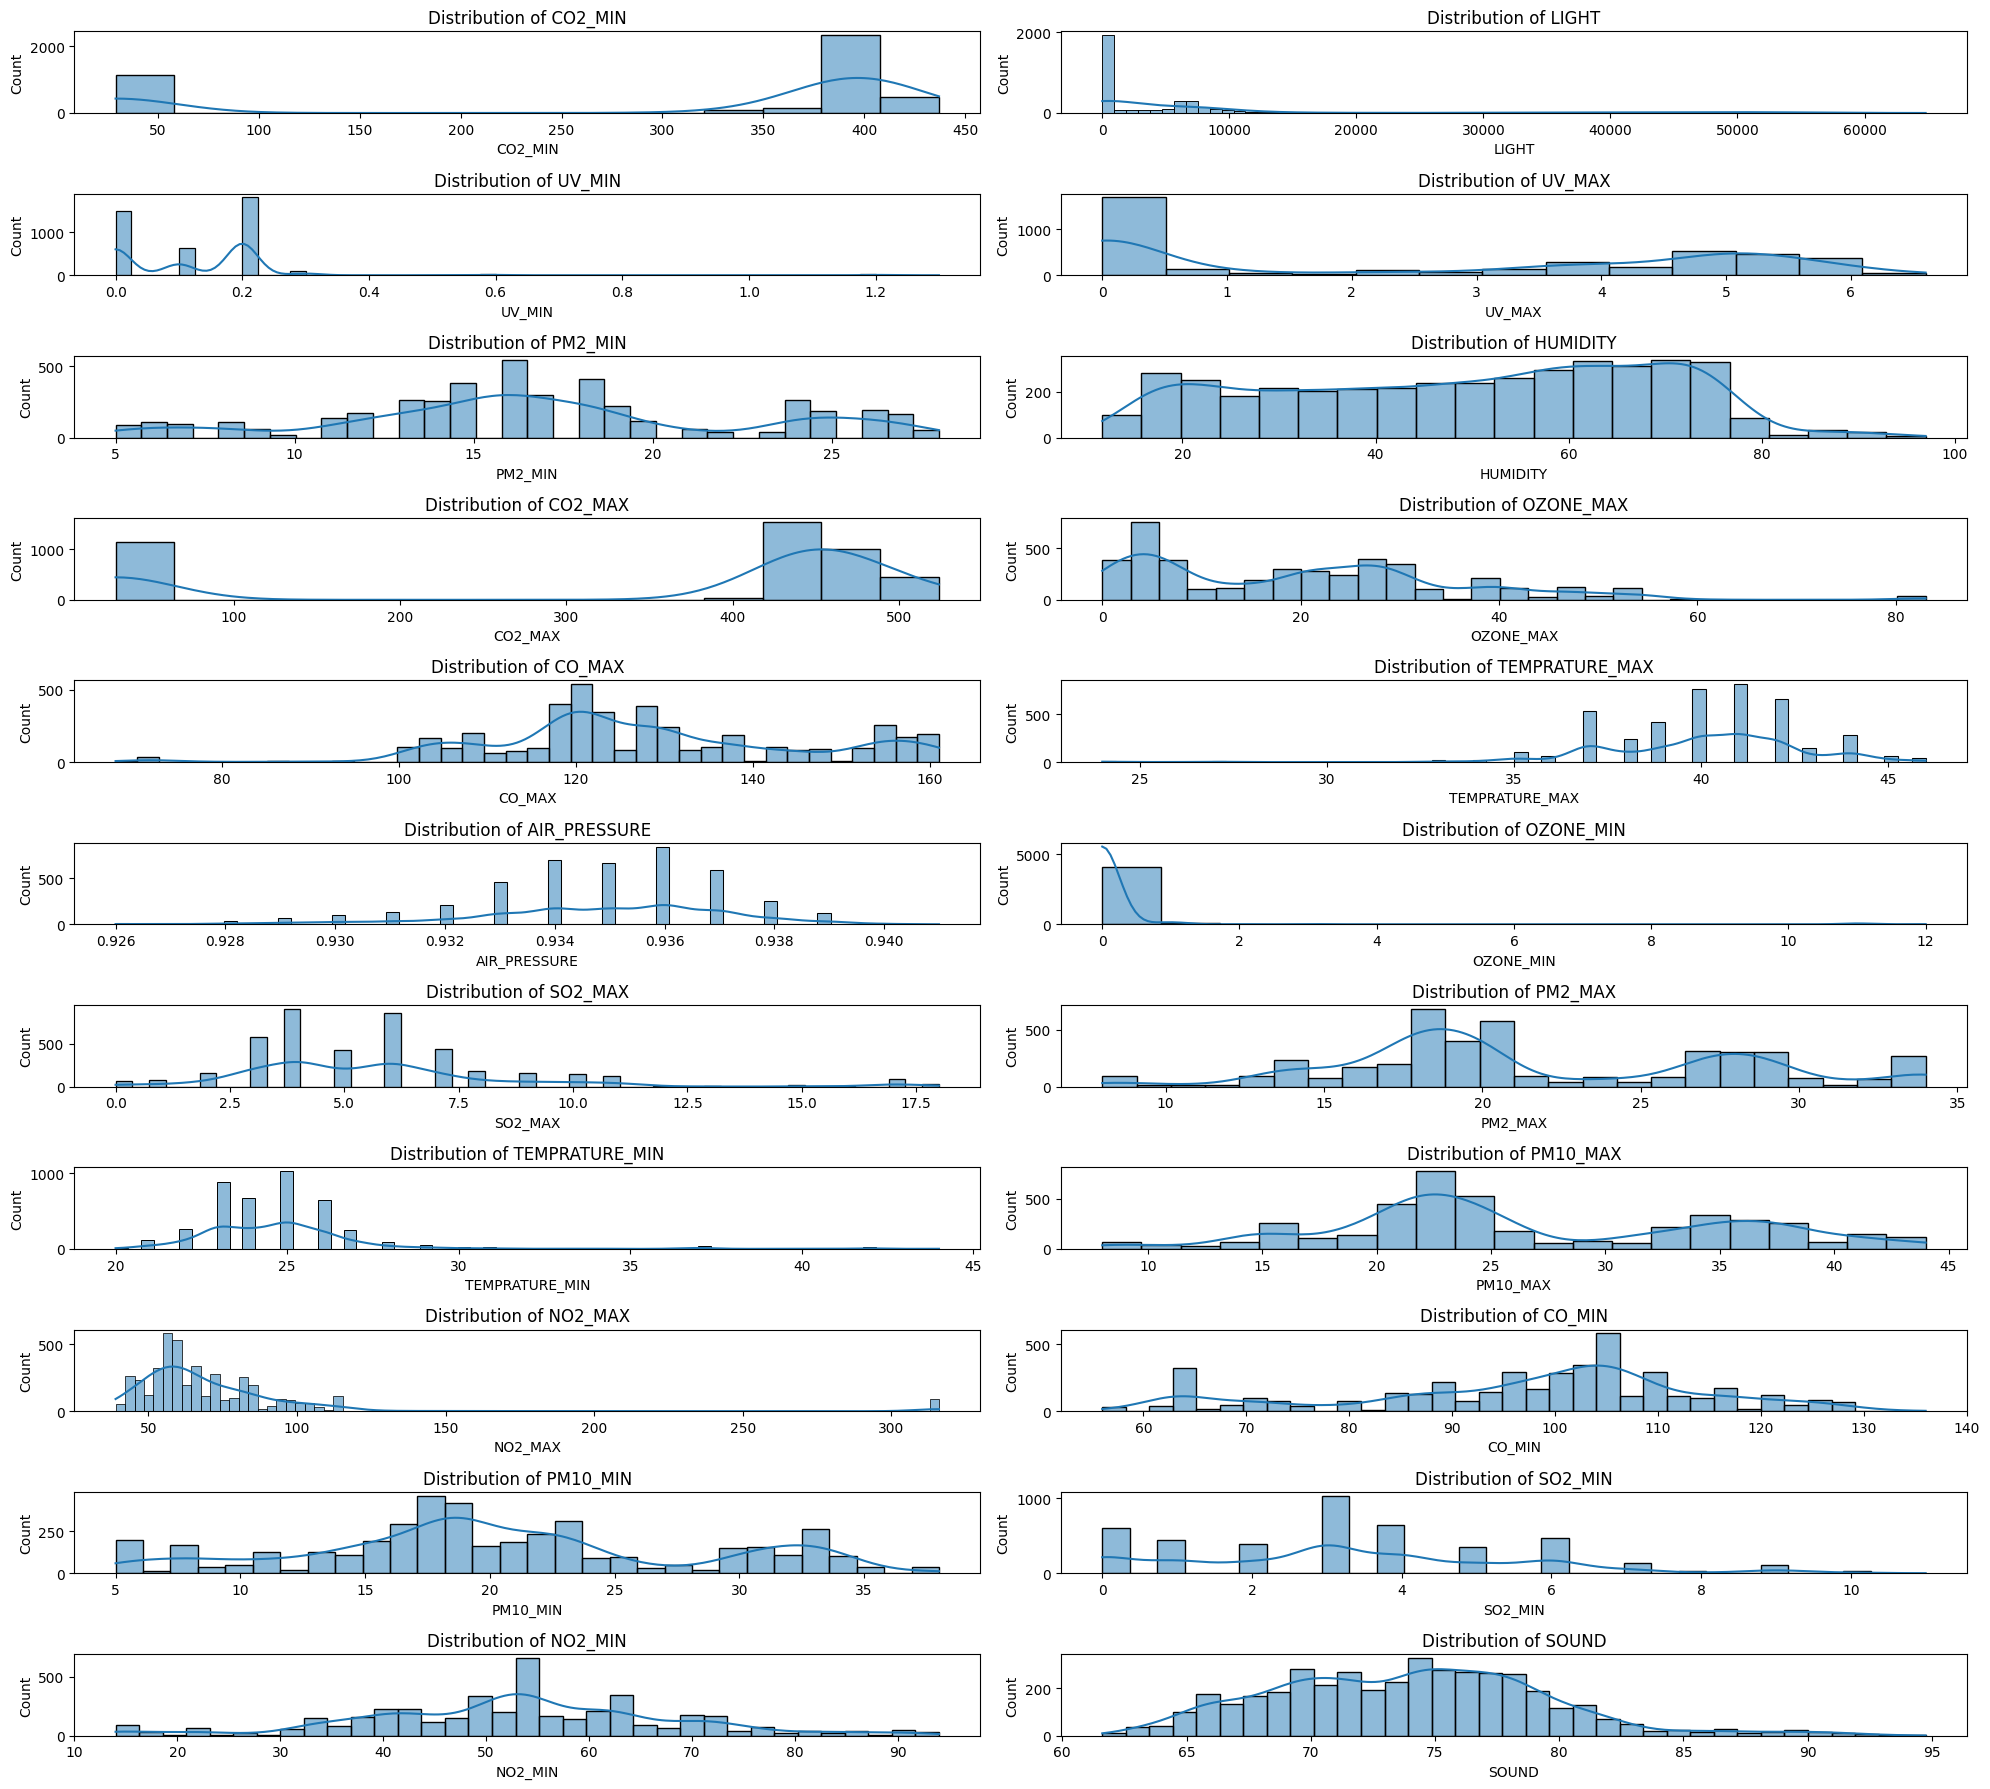

In [11]:
# taking 'BopadiSquare_65' data to plot histogram.
df_BopadiSquare_65 = df.loc[df.NAME == 'BopadiSquare_65']

features_to_exclude = ['NAME', 'LASTUPDATEDATETIME', 'Lattitude', 'Longitude']
features_to_visualize = list(set(df_BopadiSquare_65.columns) - set(features_to_exclude))

# subplots for each feature
n_features_to_visualize = len(features_to_visualize)

#the number of rows needed
n_rows = (n_features_to_visualize // 2) + (n_features_to_visualize % 2)

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(20, 18))

for i, feature in enumerate(features_to_visualize):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    sns.histplot(df_BopadiSquare_65[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    
    
#     # Fit a normal distribution to the data
#     mu, std = norm.fit(df_BopadiSquare_65[feature])
#     xmin, xmax = ax.get_xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(x, mu, std)
    
# will remove empty subplots if the number of features is odd (in this case number of features are even)
if n_features_to_visualize % 2 != 0:
    fig.delaxes(axes[n_rows - 1, 1])

plt.tight_layout()
plt.savefig("histogram_data_dist.pdf", format="pdf")
plt.show()

This is the histohgram of plot of environmental features at location BopadiSquare_65 in Pune smart city. These data are not normally distributed, so filling of missing entries of these features with of their coressponding mean is not a good idea. And also imputation with mean value is susceptible to outlier.

**In our data there is 10 locatioin in Pune smart city and every minute sensor is recording environmental data of all these location and updating into the dataset. So idea is to arrange environmental data of each location together and do filling of missing value based on the median of dataset of only that particular location/station.**

In [12]:
df.isna().sum()

NAME                      0
HUMIDITY               5121
LIGHT                  6072
NO2_MAX                 577
NO2_MIN                 577
OZONE_MAX               608
OZONE_MIN               608
PM10_MAX               3233
PM10_MIN               3233
PM2_MAX                3233
PM2_MIN                3233
SO2_MAX                 837
SO2_MIN                 837
CO_MAX                  608
CO_MIN                  608
CO2_MAX                1565
CO2_MIN                1565
SOUND                  5120
TEMPRATURE_MAX         5061
TEMPRATURE_MIN         5061
UV_MAX                12518
UV_MIN                12518
AIR_PRESSURE           5120
LASTUPDATEDATETIME        0
Lattitude                 0
Longitude                 0
dtype: int64

In [13]:
df1 = df.copy()
# features of which nan entries will get imputed
features_to_fill_nan = list(set(df1.columns.unique()) - set(['NAME', 'LASTUPDATEDATETIME', 'Lattitude', 'Longitude']))

for location in df1["NAME"].unique(): # This will iterate through location
    df1_location = df1[df1.NAME == location].copy()  # making a copy of dataset related to where this particular location present in the origina; dataframe df1
    
    #in one time it will impute of nan entries of one feature of location and then another and so on
    # and after looping through all, loop will complete and another location come and again this will iterate through
    # the features of this current location and so on like this.
    for feature in list(set(df1_location.columns) - set(['NAME', 'LASTUPDATEDATETIME', 'Lattitude', 'Longitude'])):
        df1_location[feature].fillna(df1_location[feature].median(), inplace=True)

    df1.loc[df1.NAME == location] = df1_location
    

df1 = df1.reset_index(drop = True)


In [14]:
df1 #Nan entries is imputed

NAME  HUMIDITY     LIGHT  NO2_MAX  \
0                                BopadiSquare_65    19.995  3762.914     59.0   
1                          Karve Statue Square_5    20.730   529.245     82.0   
2                           Lullanagar_Square_14    17.387   693.375     74.0   
3                            Hadapsar_Gadital_01    18.725   723.631    110.0   
4                      PMPML_Bus_Depot_Deccan_15    20.622   816.476     93.0   
...                                          ...       ...       ...      ...   
103200                       Hadapsar_Gadital_01    73.903  3388.676      0.0   
103201  Dr Baba Saheb Ambedkar Sethu Junction_60    83.984  2530.419     37.0   
103202                      Lullanagar_Square_14    74.412  1831.434     40.0   
103203                     Karve Statue Square_5    75.912   291.391     66.0   
103204                   Pune Railway Station_28    72.648  3664.177    162.0   

        NO2_MIN  OZONE_MAX  OZONE_MIN  PM10_MAX  PM10_MIN  PM2_MAX  ...  \
0          54.0       15.0        0.0      22.0      19.0     18.0  ...   
1          77.0       18.0        0.0      23.0      19.0     19.0  ...   
2          63.0       25.0        0.0      25.0      21.0     20.0  ...   
3         105.0        5.0        0.0      26.0      21.0     21.0  ...   
4          85.0        9.0        0.0      20.0      15.0     17.0  ...   
...         ...        ...        ...       ...       ...      ...  ...   
103200      0.0       71.0       59.0       5.0       4.0      3.0  ...   
103201     34.0       17.0       10.0      20.0      15.0      8.0  ...   
103202     36.0       50.0       27.0       4.0       3.0      3.0  ...   
103203     65.0       18.0       15.0      11.0       9.0      5.0  ...   
103204    154.0        0.0        0.0       7.0       6.0      3.0  ...   

        CO2_MIN   SOUND  TEMPRATURE_MAX  TEMPRATURE_MIN  UV_MAX  UV_MIN  \
0         401.0  66.133            41.0            24.0     5.3     0.2   
1         374.0  63.568            39.0            25.0     0.8     0.1   
2           0.0  59.362            40.0            24.0     0.5     0.2   
3         427.0  72.178            38.0            26.0     1.3     0.1   
4          26.0  74.756            40.0            25.0     1.4     0.1   
...         ...     ...             ...             ...     ...     ...   
103200    142.0  80.864            27.0            24.0     0.1     0.1   
103201    334.0  83.841            28.0            24.0     0.1     0.1   
103202      0.0  67.681            27.0            23.0     0.6     0.1   
103203    335.0  65.894            27.0            24.0     0.0     0.0   
103204      0.0  81.266            28.0            24.0     0.9     0.2   

        AIR_PRESSURE  LASTUPDATEDATETIME  Lattitude  Longitude  
0              0.933 2019-05-13 12:16:00  18.559427  73.828656  
1              0.930 2019-05-13 12:16:00  18.501727  73.813595  
2              0.926 2019-05-13 12:16:00  18.487306  73.885650  
3              0.930 2019-05-13 12:16:00  18.501834  73.941478  
4              0.932 2019-05-13 12:16:00  18.451716  73.856170  
...              ...                 ...        ...        ...  
103200         0.928 2019-06-09 08:01:00  18.501834  73.941478  
103201         0.930 2019-06-09 08:01:00  18.551763  73.830648  
103202         0.924 2019-06-09 08:01:00  18.487306  73.885650  
103203         0.928 2019-06-09 08:01:00  18.501727  73.813595  
103204         0.930 2019-06-09 08:01:00  18.525066  73.792927  

[103205 rows x 26 columns]

#### Sampling data hourly

In [19]:
# Unique location names
dataframes = df1["NAME"].unique()

# Features for resampling
resample_features = list(set(df1.columns.unique()) - set(['NAME', 'Lattitude', 'Longitude', 'LASTUPDATEDATETIME']))

# Create an empty DataFrame to store the results
df2 = pd.DataFrame()

# Iterate over each unique location name
for location_name in dataframes:
    # Filter the original DataFrame for the current location
    df_location = df1[df1['NAME'] == location_name].copy()
    
    # Extract location-specific information
    latitude = df_location['Lattitude'].iloc[0]
    longitude = df_location['Longitude'].iloc[0]
    
    # Set the index and resample for the current location
    df_location.set_index('LASTUPDATEDATETIME', inplace=True)
    df_c = df_location[resample_features].resample('H').mean()
    
    # Reset the index to bring 'LASTUPDATEDATETIME' back as a column
    df_c.reset_index(inplace=True)
    
    # Add location-specific information to the result_df
    df_c['NAME'] = location_name
    df_c['Lattitude'] = latitude
    df_c['Longitude'] = longitude
    df_c = df_c.dropna()
    
    # Append the results to the result_df
    


# The df2 now contains the resampled and mean values with location information, and 'LASTUPDATEDATETIME' as a time column


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df2 # This dataframe contain hourly data

LASTUPDATEDATETIME  CO_MIN  UV_MIN  PM10_MIN  CO2_MIN  UV_MAX  NO2_MIN  \
0     2019-01-05 00:00:00    65.0     0.0      16.0    437.0     0.0     38.0   
1     2019-01-05 01:00:00    65.0     0.0      16.0    437.0     0.0     38.0   
2     2019-01-05 02:00:00    65.0     0.0      16.0    433.0     0.0     38.0   
3     2019-01-05 21:00:00    56.0     0.0      17.0    425.5     0.0     31.0   
4     2019-01-05 22:00:00    56.0     0.0      15.0    422.0     0.0     26.0   
...                   ...     ...     ...       ...      ...     ...      ...   
28781 2019-06-09 04:00:00    21.0     0.0      16.0    334.0     0.0     34.0   
28782 2019-06-09 05:00:00    21.0     0.0      16.0    334.0     0.0     34.0   
28783 2019-06-09 06:00:00    21.0     0.1      16.0    334.0     0.1     34.0   
28784 2019-06-09 07:00:00    18.0     0.1      16.0    334.0     0.1     34.0   
28785 2019-06-09 08:00:00    15.0     0.1      15.0    334.0     0.1     34.0   

       CO_MAX  AIR_PRESSURE  PM2_MIN  ...  TEMPRATURE_MIN  SO2_MAX   HUMIDITY  \
0        90.0      0.935000     13.0  ...            27.0     10.0  51.620000   
1        96.5      0.935000     13.0  ...            25.5     10.0  57.754000   
2       100.0      0.934500     13.0  ...            24.0     10.0  62.386500   
3       100.0      0.933000     13.0  ...            24.5     12.5  73.113750   
4       100.0      0.933667     11.0  ...            24.0     15.0  66.239333   
...       ...           ...      ...  ...             ...      ...        ...   
28781    78.0      0.930000      7.0  ...            24.0      6.0  83.740000   
28782    78.0      0.930000      7.0  ...            24.0      6.0  82.660000   
28783    78.0      0.931000      7.0  ...            24.0      6.0  88.272750   
28784    78.0      0.930000      7.0  ...            24.0      6.0  84.148000   
28785    78.0      0.930000      7.0  ...            24.0      6.0  83.984000   

       PM2_MAX  CO2_MAX  TEMPRATURE_MAX  PM10_MAX  \
0         23.5    437.0            27.0      30.0   
1         24.5    438.5            27.0      31.5   
2         25.0    440.0            27.0      32.0   
3         26.0    425.5            24.5      32.0   
4         26.0    422.0            24.0      32.0   
...        ...      ...             ...       ...   
28781      8.0    372.0            28.0      20.0   
28782      8.0    372.0            28.0      20.0   
28783      8.0    372.0            28.0      20.0   
28784      8.0    372.0            28.0      20.0   
28785      8.0    372.0            28.0      20.0   

                                           NAME  Lattitude  Longitude  
0                               BopadiSquare_65  18.559427  73.828656  
1                               BopadiSquare_65  18.559427  73.828656  
2                               BopadiSquare_65  18.559427  73.828656  
3                               BopadiSquare_65  18.559427  73.828656  
4                               BopadiSquare_65  18.559427  73.828656  
...                                         ...        ...        ...  
28781  Dr Baba Saheb Ambedkar Sethu Junction_60  18.551763  73.830648  
28782  Dr Baba Saheb Ambedkar Sethu Junction_60  18.551763  73.830648  
28783  Dr Baba Saheb Ambedkar Sethu Junction_60  18.551763  73.830648  
28784  Dr Baba Saheb Ambedkar Sethu Junction_60  18.551763  73.830648  
28785  Dr Baba Saheb Ambedkar Sethu Junction_60  18.551763  73.830648  

[28786 rows x 26 columns]

## Robust Scaling and Removing Outlier  
Our Data is not normally distributed, and robust scaling is suitable for non-normal distributed datas and outlier has no significant effect on robust scaling.

#### Since each location environmental data collected from not the same sensor so it should be scaled location wise data.

In [ ]:
AQI_features = ['PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 'CO_MAX', 'CO_MIN', 'CO2_MAX', 'CO2_MIN', 'SO2_MIN', 'SO2_MAX', 'NO2_MAX', 'NO2_MIN']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

def scale_and_remove_outliers(data, location_column="NAME", datetime_column="LASTUPDATEDATETIME", scaler_quantile_range=(25.0, 75.0), contamination=0.05, exclude_columns=[], outlier_features=[]):
    """
        this function will scale the data for each location separately using
          RobustScaler and remove outliers using Isolation Forest.
    """

    # Excluding datetime columns from scaling
    non_datetime_columns = [col for col in data.columns if col != datetime_column]
    features = data[non_datetime_columns].drop(columns=[location_column] + exclude_columns)

    # Scaling the data using RobustScaler
    robust_scaler = RobustScaler(quantile_range=scaler_quantile_range)
    scaled_features = robust_scaler.fit_transform(features)

    # Detecting outliers using Isolation Forest
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = isolation_forest.fit_predict(scaled_features)

    # only the non-outlier data
    non_outliers = data[outlier_labels == 1].copy()  # Create a copy

    # Outlier detection using IQR and removal
    Q1 = non_outliers[outlier_features].quantile(0.25)
    Q3 = non_outliers[outlier_features].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filtering indices that exist in the DataFrame
    lower_array = non_outliers.index[(non_outliers[outlier_features] <= lower).any(axis=1)].tolist()
    upper_array = non_outliers.index[(non_outliers[outlier_features] >= upper).any(axis=1)].tolist()

    non_outliers.drop(index=lower_array, inplace=True)
    non_outliers.drop(index=upper_array, inplace=True)

    # datetime_column  Retaining
    non_outliers[datetime_column] = data.loc[non_outliers.index, datetime_column]

    return non_outliers.reset_index(drop=True)

In [ ]:
df3 = scale_and_remove_outliers(df2, exclude_columns=['Lattitude', 'Longitude'], outlier_features=AQI_features)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26293 entries, 0 to 26292
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   LASTUPDATEDATETIME  26293 non-null  datetime64[ns]
 1   CO_MIN              26293 non-null  float64       
 2   UV_MIN              26293 non-null  float64       
 3   PM10_MIN            26293 non-null  float64       
 4   CO2_MIN             26293 non-null  float64       
 5   UV_MAX              26293 non-null  float64       
 6   NO2_MIN             26293 non-null  float64       
 7   CO_MAX              26293 non-null  float64       
 8   AIR_PRESSURE        26293 non-null  float64       
 9   PM2_MIN             26293 non-null  float64       
 10  SOUND               26293 non-null  float64       
 11  OZONE_MIN           26293 non-null  float64       
 12  SO2_MIN             26293 non-null  float64       
 13  LIGHT               26293 non-null  float64   

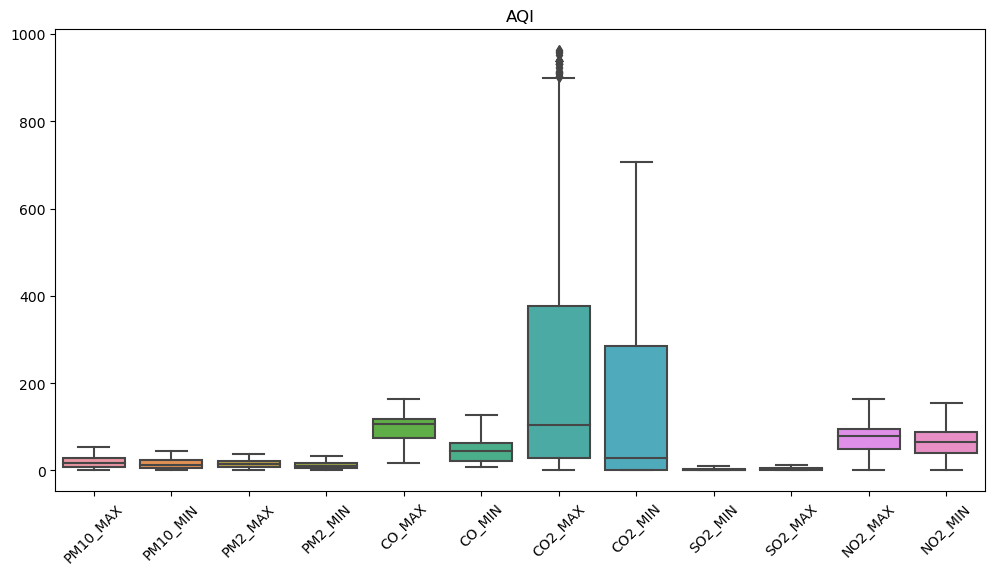

In [ ]:
AQI_features = ['PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 'CO_MAX', 'CO_MIN', 'CO2_MAX', 'CO2_MIN', 'SO2_MIN', 'SO2_MAX', 'NO2_MAX', 'NO2_MIN']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df3[AQI_features])
plt.title('AQI')
plt.xticks(rotation=45) 

plt.show()

In [ ]:
AQI_features = ['PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 'CO_MAX', 'CO_MIN', 'CO2_MAX', 'CO2_MIN', 'SO2_MIN', 'SO2_MAX', 'NO2_MAX', 'NO2_MIN']

# IQR
Q1 = df3[AQI_features].quantile(0.25)
Q3 = df3[AQI_features].quantile(0.75)
IQR = Q3 - Q1

# upper and lower limits
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# arrays of Boolean values indicating the outlier rows
upper_array = np.where(df3[AQI_features]>=upper)[0]
lower_array = np.where(df3[AQI_features]<=lower)[0]

# Removing the outliers
df3.drop(index=upper_array, inplace=True)
df3.drop(index=lower_array, inplace=True)

print("New Shape: ", df3.shape)
df3 = df3.reset_index(drop= True)

New Shape:  (26248, 26)


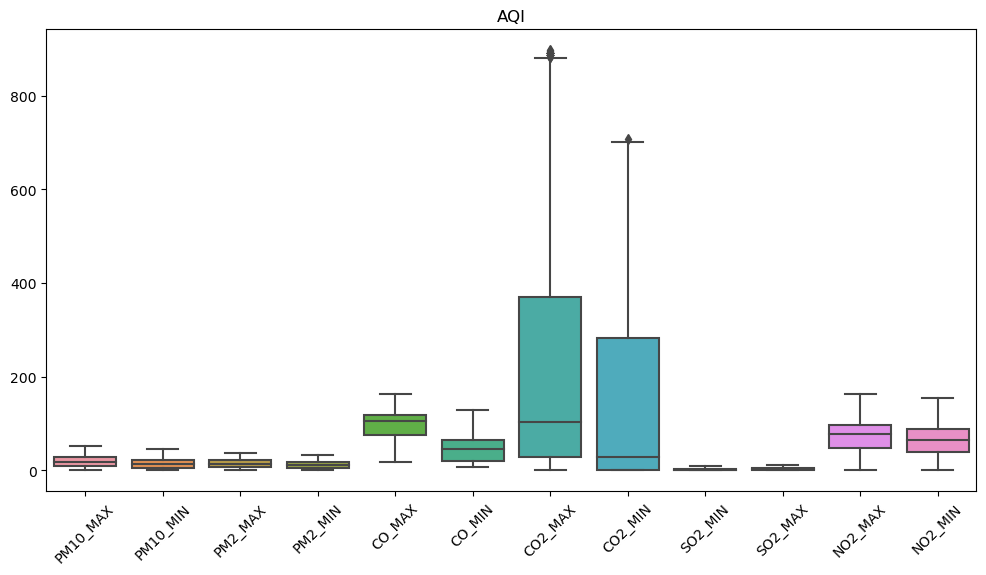

In [ ]:
AQI_features = ['PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 'CO_MAX', 'CO_MIN', 'CO2_MAX', 'CO2_MIN', 'SO2_MIN', 'SO2_MAX', 'NO2_MAX', 'NO2_MIN']

plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df3[AQI_features])
plt.title('AQI')

plt.xticks(rotation=45)

plt.show()

In [ ]:
df3_dict = dict()
for loaction in df3["NAME"].unique():
    df3_dict[location] = df3[df3.NAME == location]

In [ ]:
df4 = df3.copy()
# Calculating Excel serial numbers and add a new column 'second'
df4['second'] = (df4['LASTUPDATEDATETIME'] - pd.Timestamp("1899-12-30")) / pd.Timedelta('1D')
df4 = df4.reset_index(drop = True)

In [ ]:
print("Location: \tnumber of entries")
for location in df4["NAME"].unique():
    df_location = df4.loc[df4.NAME == location]
    print(f"{location}: {df_location.shape}")

Location: 	number of entries
BopadiSquare_65: (1033, 27)
Karve Statue Square_5: (2824, 27)
Lullanagar_Square_14: (3383, 27)
Hadapsar_Gadital_01: (2941, 27)
PMPML_Bus_Depot_Deccan_15: (3285, 27)
Goodluck Square_Cafe_23: (3492, 27)
Chitale Bandhu Corner_41: (2987, 27)
Pune Railway Station_28: (3223, 27)
Rajashri_Shahu_Bus_stand_19: (2999, 27)
Dr Baba Saheb Ambedkar Sethu Junction_60: (81, 27)


# Exploratory Data Analysis

### Correlation between features

C:\Users\farha\AppData\Local\Temp\ipykernel_1940\1258934357.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df3.corr()


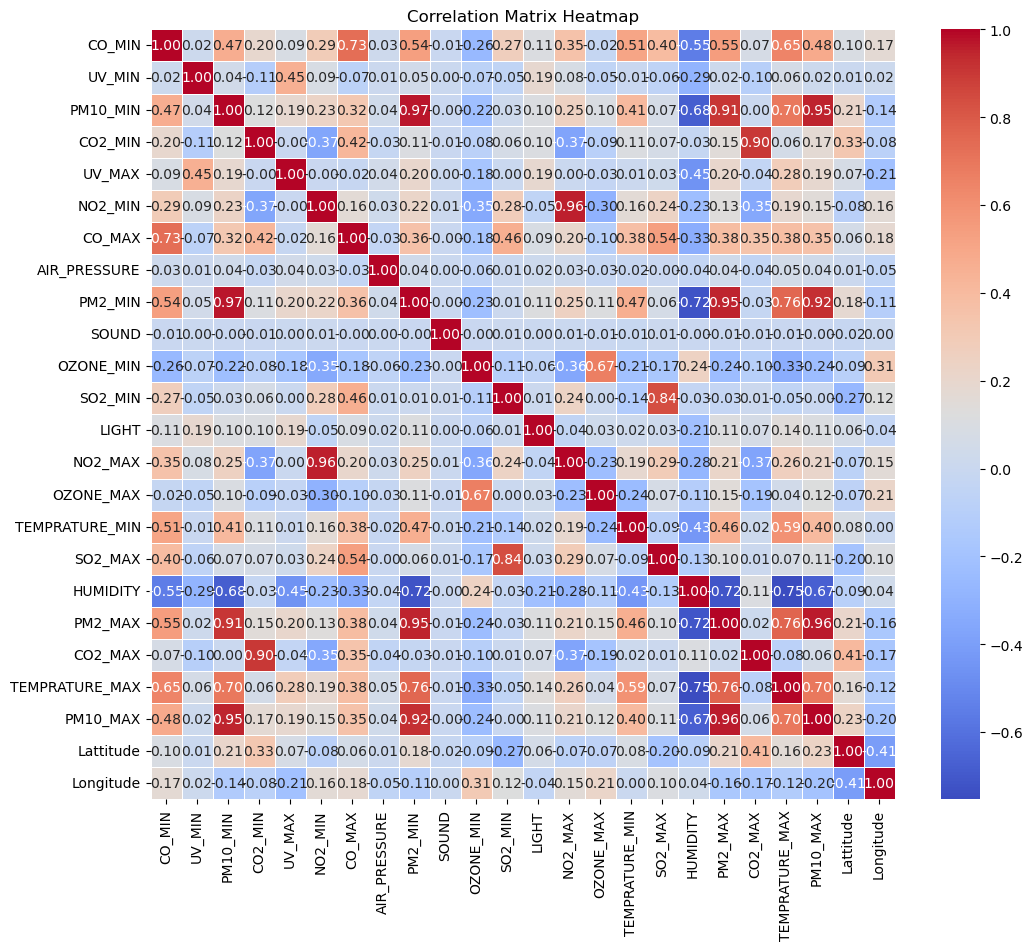

In [ ]:
# checking correlation between environmental features collected by a particular sensor (of particular location)
# location is BopadiSquare_65
#corr_matrix = df_BopadiSquare_65[df_BopadiSquare_65.columns.difference(["LASTUPDATEDATETIME", "Lattitude",  "Longitude", "NAME"])].corr()
# checking for correlation on whole dataframe
corr_matrix = df3.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.savefig("correlation_matrix_plot.png", format="png")
plt.show()


From correlation matrix it can be concluded:  
"Pressure", "Light" and "Sound" has no much effect on other features,  
  
We are focusing on max value recorded each minute by sensors as it is the extreme which will affect more livelihood.

## Plotting Temperature vs Time for different location

In [ ]:
# Unique location names
dataframes = df4["NAME"].unique()

# Features for resampling
resample_features = list(set(df4.columns.unique()) - set(['NAME', 'Lattitude', 'Longitude', 'LASTUPDATEDATETIME']))

df5 = pd.DataFrame()

# Iterating over each unique location name
for location_name in dataframes:
    # the current location
    df_location = df4[df4['NAME'] == location_name].copy()
    
    # location-specific information
    latitude = df_location['Lattitude'].iloc[0]
    longitude = df_location['Longitude'].iloc[0]

    df_location.set_index('LASTUPDATEDATETIME', inplace=True)
    df_c = df_location[resample_features].resample('24H').mean()
    
    # Reseting the index to bring 'LASTUPDATEDATETIME' back as a column
    df_c.reset_index(inplace=True)
    
    # Add location-specific information to the result_df
    df_c['NAME'] = location_name
    df_c['Lattitude'] = latitude
    df_c['Longitude'] = longitude
    df_c = df_c.dropna()
    
    # Appending results to df5
    df5 = df5.append(df_c, ignore_index=True)

# The df5 now contains the resampled and mean values with location information, and 'LASTUPDATEDATETIME' as a time column


C:\Users\farha\AppData\Local\Temp\ipykernel_1940\1739319912.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df_c, ignore_index=True)
C:\Users\farha\AppData\Local\Temp\ipykernel_1940\1739319912.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df_c, ignore_index=True)
C:\Users\farha\AppData\Local\Temp\ipykernel_1940\1739319912.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df_c, ignore_index=True)
C:\Users\farha\AppData\Local\Temp\ipykernel_1940\1739319912.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df_c, ignore_index=True)
C:\Users\farha\AppData\L

### Temperature vs time plot

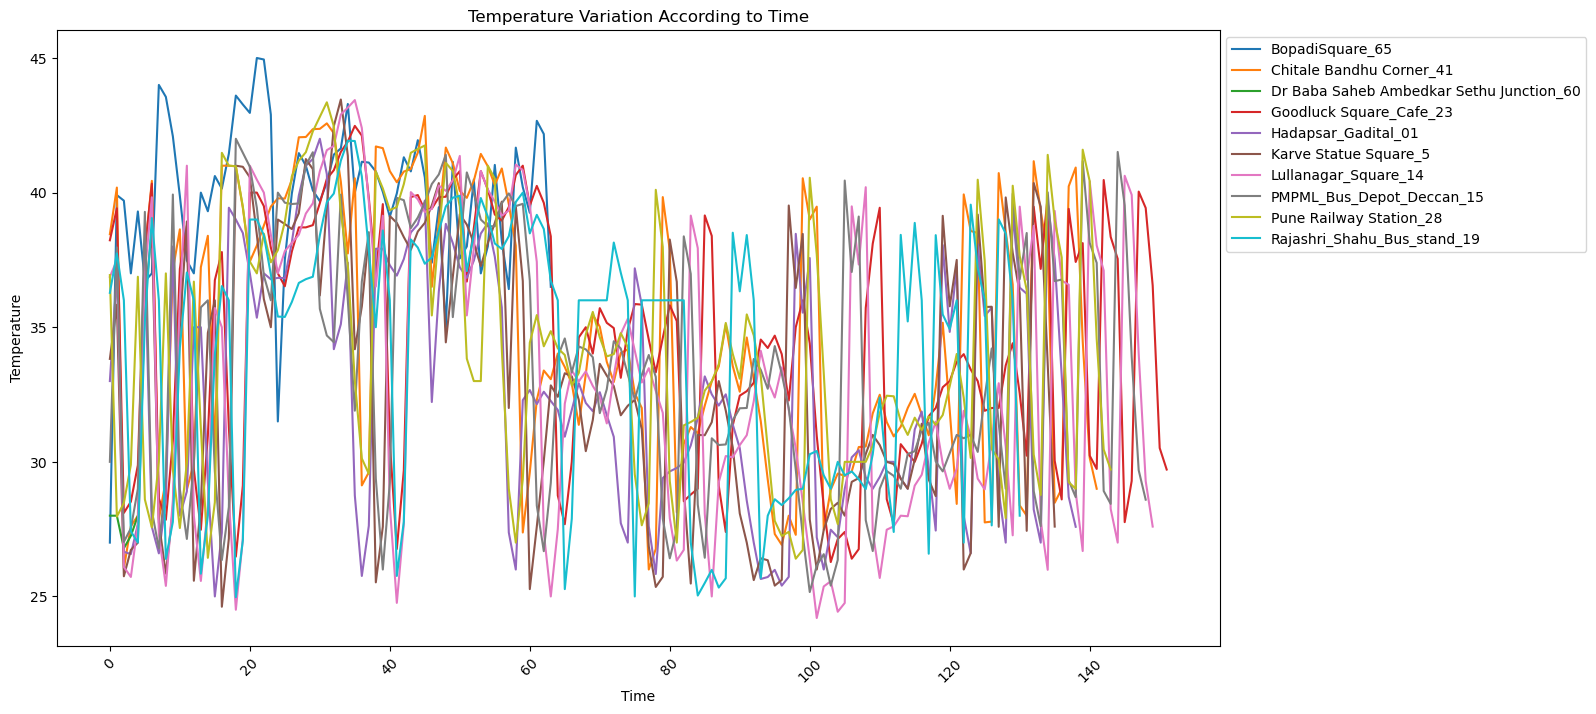

In [ ]:
# Grouping Data by Location
grouped_data = df5.groupby('NAME')

# Plotting
plt.figure(figsize=(15, 8))
for location, group in grouped_data:
    # Convert datetime.time to string for plotting
    plt.plot(range(len(group['second'])), group['TEMPRATURE_MAX'], label=location)

plt.title('Temperature Variation According to Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.savefig("temperature_vs_time.png", format="png")
plt.show()


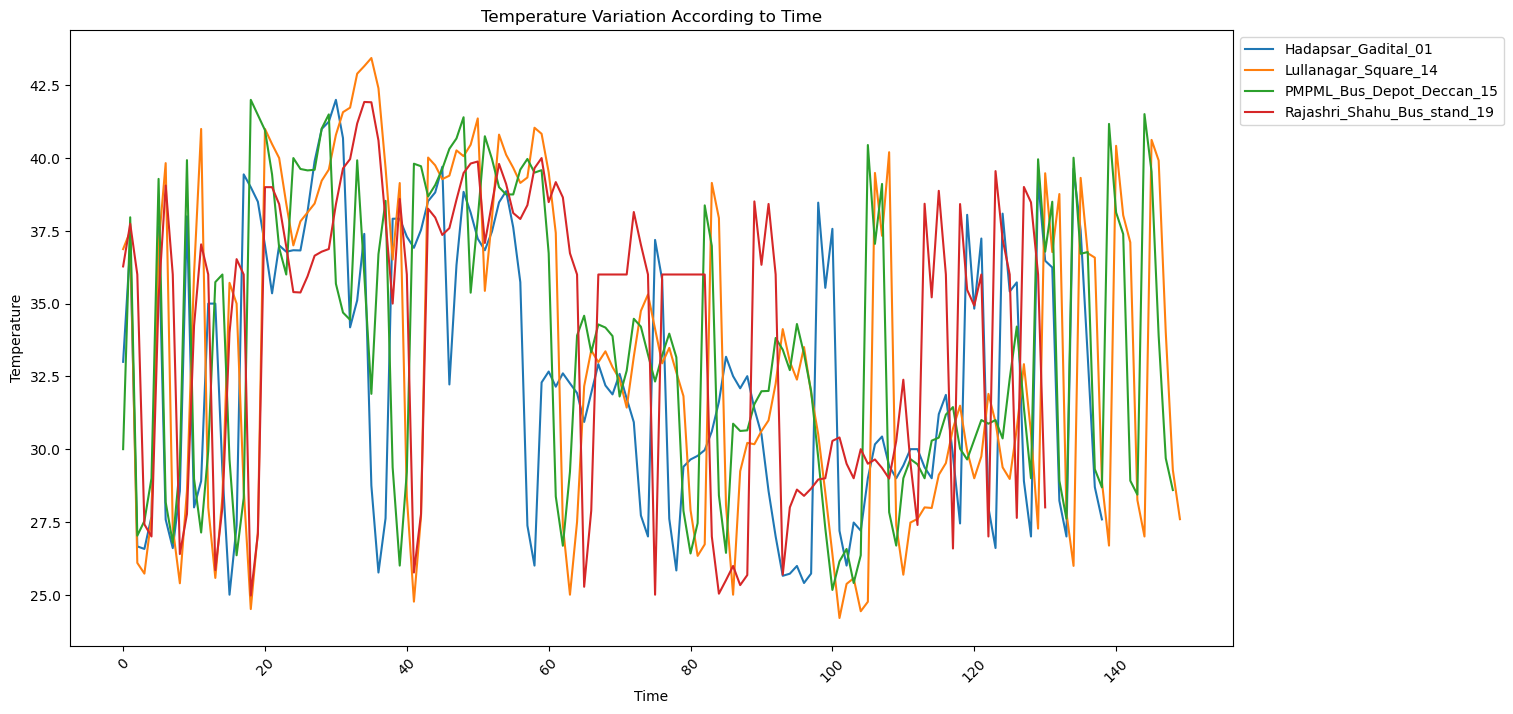

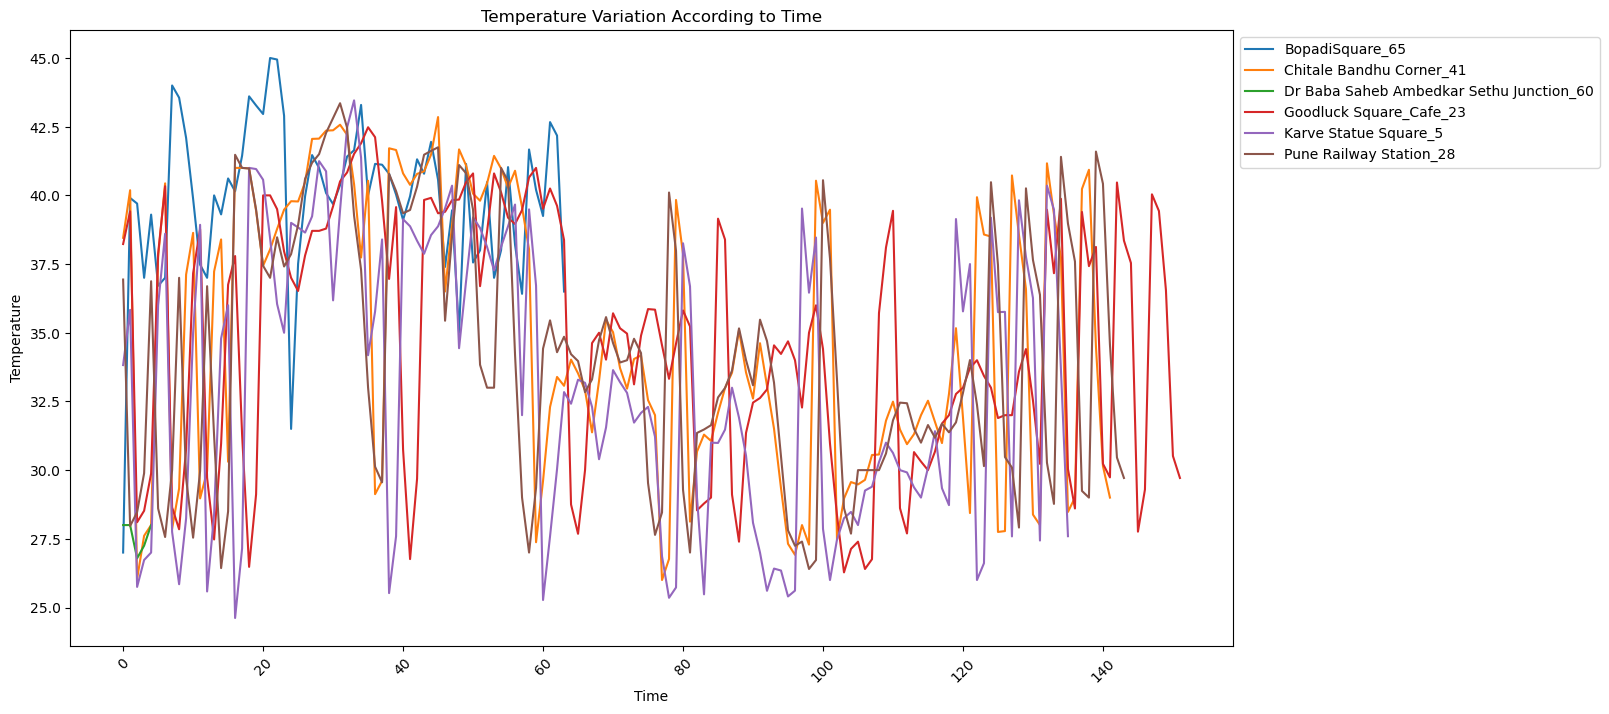

In [ ]:
# Grouping Data by Location
grouped_data = df5.groupby('NAME')
cluster_1_locations = ['Lullanagar_Square_14',
       'Hadapsar_Gadital_01', 'PMPML_Bus_Depot_Deccan_15', 'Rajashri_Shahu_Bus_stand_19']

cluster_2_locations = ['BopadiSquare_65', 'Karve Statue Square_5',
       'Goodluck Square_Cafe_23', 'Chitale Bandhu Corner_41',
       'Pune Railway Station_28','Dr Baba Saheb Ambedkar Sethu Junction_60']

# Plotting
plt.figure(figsize=(15, 8))
for location, group in grouped_data:
    if location in cluster_1_locations:
        plt.plot(range(len(group['second'])), group['TEMPRATURE_MAX'], label=location)

plt.title('Temperature Variation According to Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()



# Plotting
plt.figure(figsize=(15, 8))
for location, group in grouped_data:
    if location in cluster_2_locations:
        plt.plot(range(len(group['second'])), group['TEMPRATURE_MAX'], label=location)

plt.title('Temperature Variation According to Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

# Clustering

### Clustering of locations in Pune smart city

In [ ]:
location_features = ["NAME", "Lattitude", "Longitude"]
df_locations = df4[location_features]
df_locations  = df_locations.drop_duplicates()
df_locations = df_locations.reset_index(drop=True)
lat_long = df_locations[["Lattitude", "Longitude"]]

## Using K_Means

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

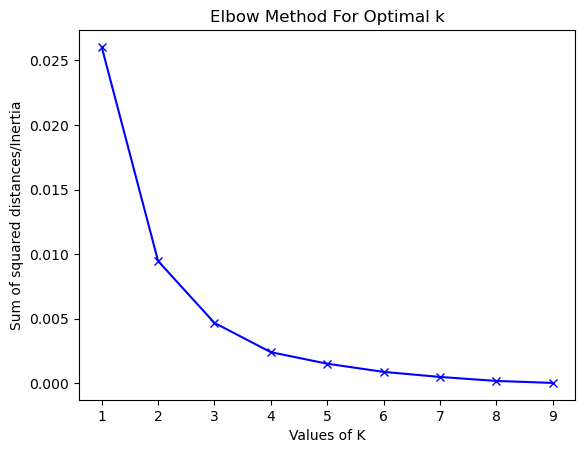

In [ ]:
squared_distances_sum = []
K = range(1, 10)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(lat_long)
    squared_distances_sum.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(K, squared_distances_sum, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.savefig("lat_long_kmeans_elbow.png", format="png")
plt.show()


C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


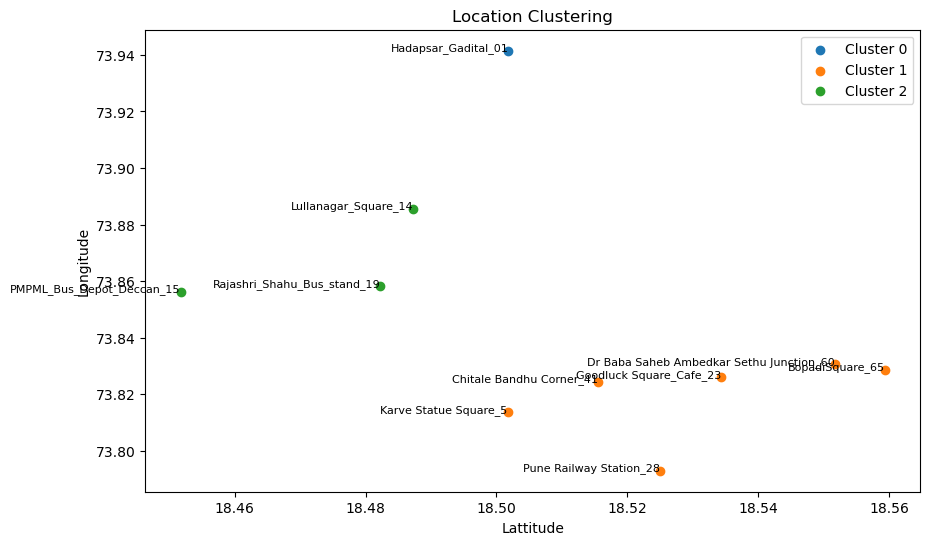

In [ ]:
# Applying k-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_locations['Cluster'] = kmeans.fit_predict(lat_long)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = df_locations[df_locations['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Lattitude'], cluster_data['Longitude'], label=f'Cluster {cluster_label}')

# Adding location names to the plot
for i, row in df_locations.iterrows():
    plt.text(row['Lattitude'], row['Longitude'], row['NAME'], fontsize=8, ha='right')

plt.title('Location Clustering')
plt.xlabel('Lattitude')
plt.ylabel('Longitude')
plt.legend()
plt.savefig("lat_long_kmeans_location_clustering.png", format="png")
plt.show()

In [ ]:
import folium
from tqdm import tqdm

# Assuming df_locations is your DataFrame with "Latitude", "Longitude", "Cluster", and "NAME" columns
# Assuming Pune coordinates
pune_lat = 18.5204
pune_long = 73.8567

m_pune = folium.Map([pune_lat, pune_long], zoom_start=12)

radius = 5
cluster_color = ["red", "blue", "black", "yellow"]

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

# Filter DataFrame for Pune
# df_pune_locations = df_locations['NAME']

for i in tqdm(range(len(df_locations))):
    lat = df_locations.iloc[i]['Lattitude']
    long = df_locations.iloc[i]['Longitude']
    cluster_index = df_locations.iloc[i]['Cluster']
    
    popup_text = df_locations.iloc[i]['NAME']

    folium.CircleMarker(
        location=[lat, long],
        radius=radius,
        color=cluster_color[cluster_index],
        stroke=False,
        fill=True,
        fill_opacity=0.6,
        opacity=1,
        popup=folium.Popup(popup_text)
    ).add_to(m_pune)

m_pune.save("folium_map.html")
m_pune

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 3330.93it/s]


# Dimension Reduction

## Prinicipal Component Analysis

In [ ]:
AQI_features = ['PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 'CO_MAX', 'CO_MIN', 'CO2_MAX', 'CO2_MIN', 'SO2_MIN', 'SO2_MAX', 'NO2_MAX', 'NO2_MIN']

df_AQI = df5[AQI_features]

X = df_AQI.values

# feature scaling (standardisation)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
# Principal Component Analysis (PCA)
covariance_matrix = np.cov(X_standardized.T)
covariance_matrix

evals, eig_vectors = np.linalg.eig(covariance_matrix)

print(f"Evals: {evals}")

print(f"Eigen vectors: {eig_vectors}")

Evals: [4.79992214e+00 2.72763964e+00 2.35955488e+00 9.09048951e-01
 6.32910912e-01 2.02277156e-01 1.84773234e-01 2.71462519e-03
 1.91264545e-02 6.94792533e-02 4.75426967e-02 5.49192176e-02]
Eigen vectors: [[ 4.07875917e-01  9.34178810e-02  2.19657494e-01  1.33083494e-01
  -1.57155469e-01 -1.53850464e-01 -1.67290564e-01 -4.69784479e-01
  -1.21223781e-01  1.70732610e-01  6.27985977e-01  1.53906113e-01]
 [ 4.06663187e-01  5.55224191e-02  2.33763493e-01  1.07695224e-01
  -2.01262995e-01  2.12207389e-01  1.12574434e-01  5.14086442e-01
   1.81121665e-01  1.98657596e-01  1.55795748e-01 -5.53407468e-01]
 [ 4.12292094e-01  8.38570644e-02  2.20325409e-01  1.23730898e-01
  -5.77023267e-04 -2.05799204e-01 -1.45151617e-01  4.86760387e-01
  -1.80619895e-01 -1.93015130e-01 -2.32813340e-01  5.78525583e-01]
 [ 4.14194973e-01  5.00089315e-02  2.31585502e-01  9.91073306e-02
  -6.42809219e-02  1.90443839e-01  1.46703684e-01 -5.26662414e-01
   9.90248063e-02 -1.39053636e-01 -6.14737787e-01 -1.27070804e-01

In [ ]:
variances = []
for i in range(len(evals)):
    variances.append(evals[i]/np.sum(evals))
    
print(np.sum(variances), '\n', variances)

1.0000000000000002 
 [0.3996634841616796, 0.2271157593782911, 0.19646733794891053, 0.07569157586408612, 0.05269905905785193, 0.01684252174170793, 0.01538506510454981, 0.00022603211688015788, 0.0015925561343691037, 0.005785160595171562, 0.00395862250517465, 0.004572825391327659]


In [ ]:
np.sum(variances[0:3])

0.8232465814888812

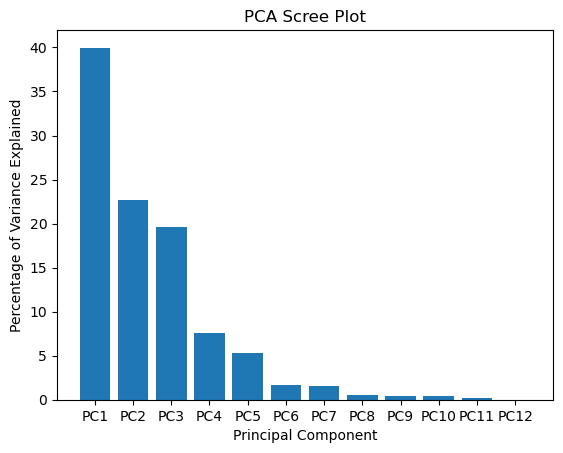

In [ ]:
# Sorted eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(evals)[::-1]
evals = evals[sorted_indices]
eig_vectors = eig_vectors[:, sorted_indices]

# percentage of variance explained by each principal component
variances = evals / np.sum(evals)

# plot
percent_variance = np.round(variances * 100, decimals=2)
columns = [f'PC{i+1}' for i in range(len(percent_variance))]

plt.bar(x=range(1, len(percent_variance) + 1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.savefig("AQI_PCA_percengtage_of_variance.png", format="png")
plt.show()


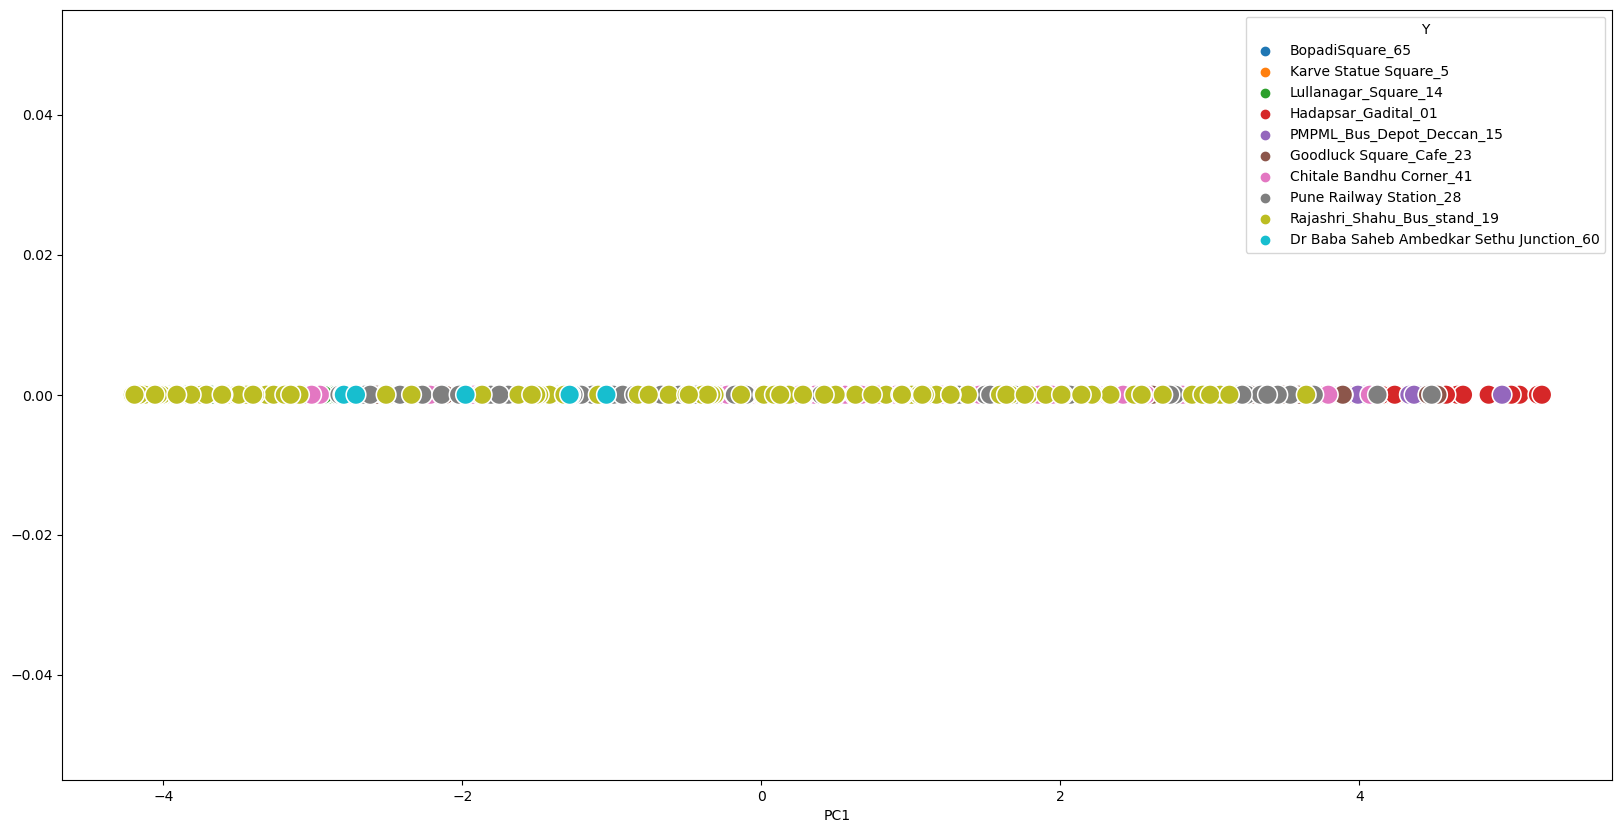

In [ ]:
projected_1 =  X_standardized.dot(eig_vectors.T[0])
projected_2 = X_standardized.dot(eig_vectors.T[1])
projected_3 = X_standardized.dot(eig_vectors.T[2])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['PC3'] = projected_3
res['Y'] = df5['NAME']
res.head(10)


plt.figure(figsize=(20, 10))
sns.scatterplot(x=res['PC1'], y=[0] * len(res), hue=res['Y'], s=200)
plt.savefig("kmeans_AQI_PCA_1D.png", format="png")

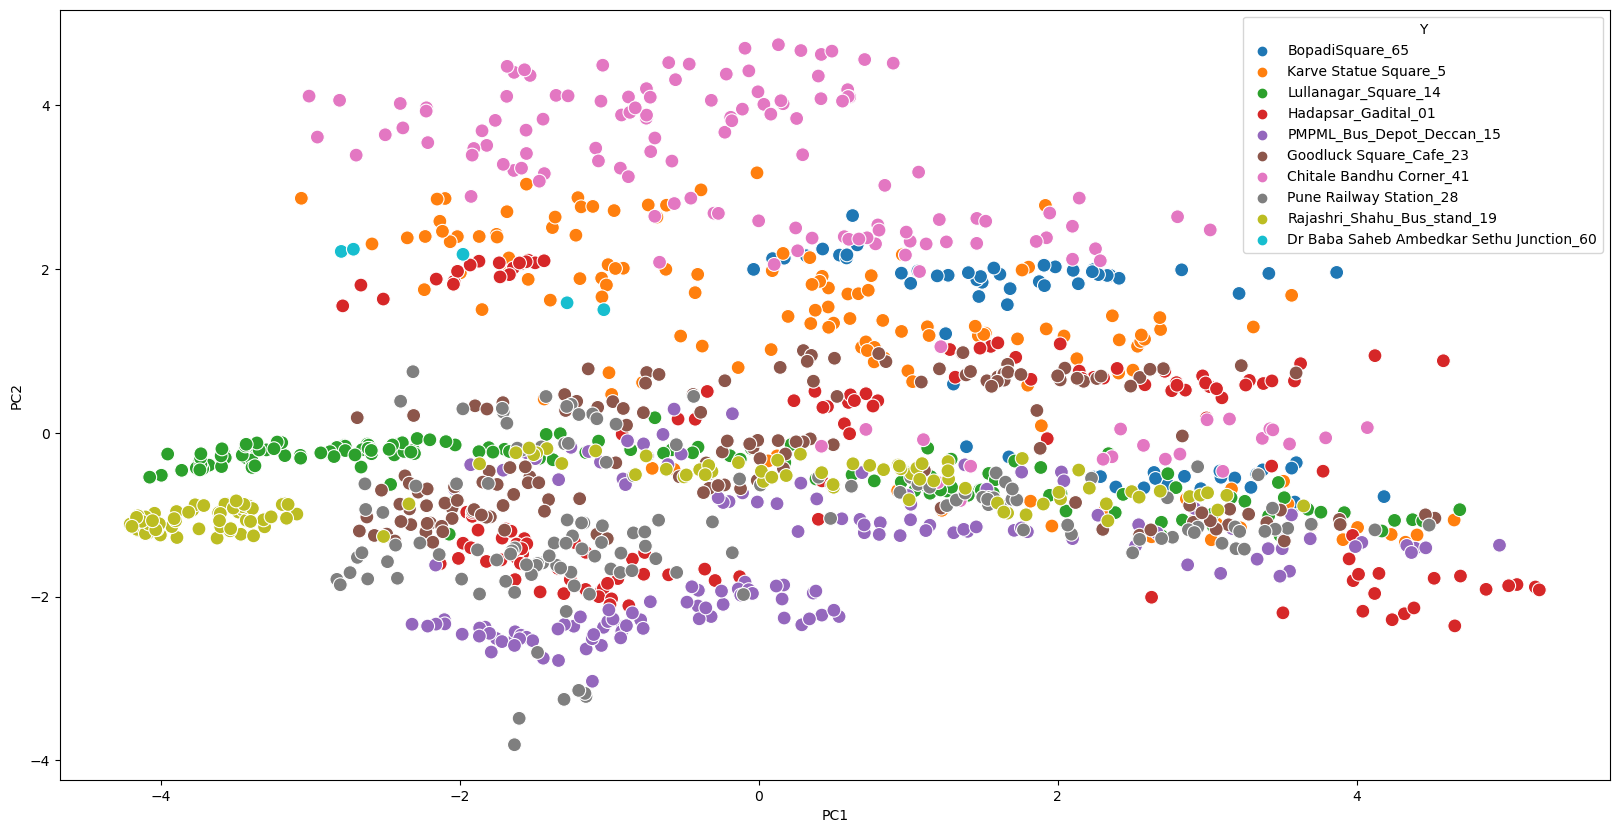

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=res['PC1'], y=res['PC2'], hue=res['Y'], s=100)
plt.savefig("kmeans_AQI_PCA_2D.png", format="png")

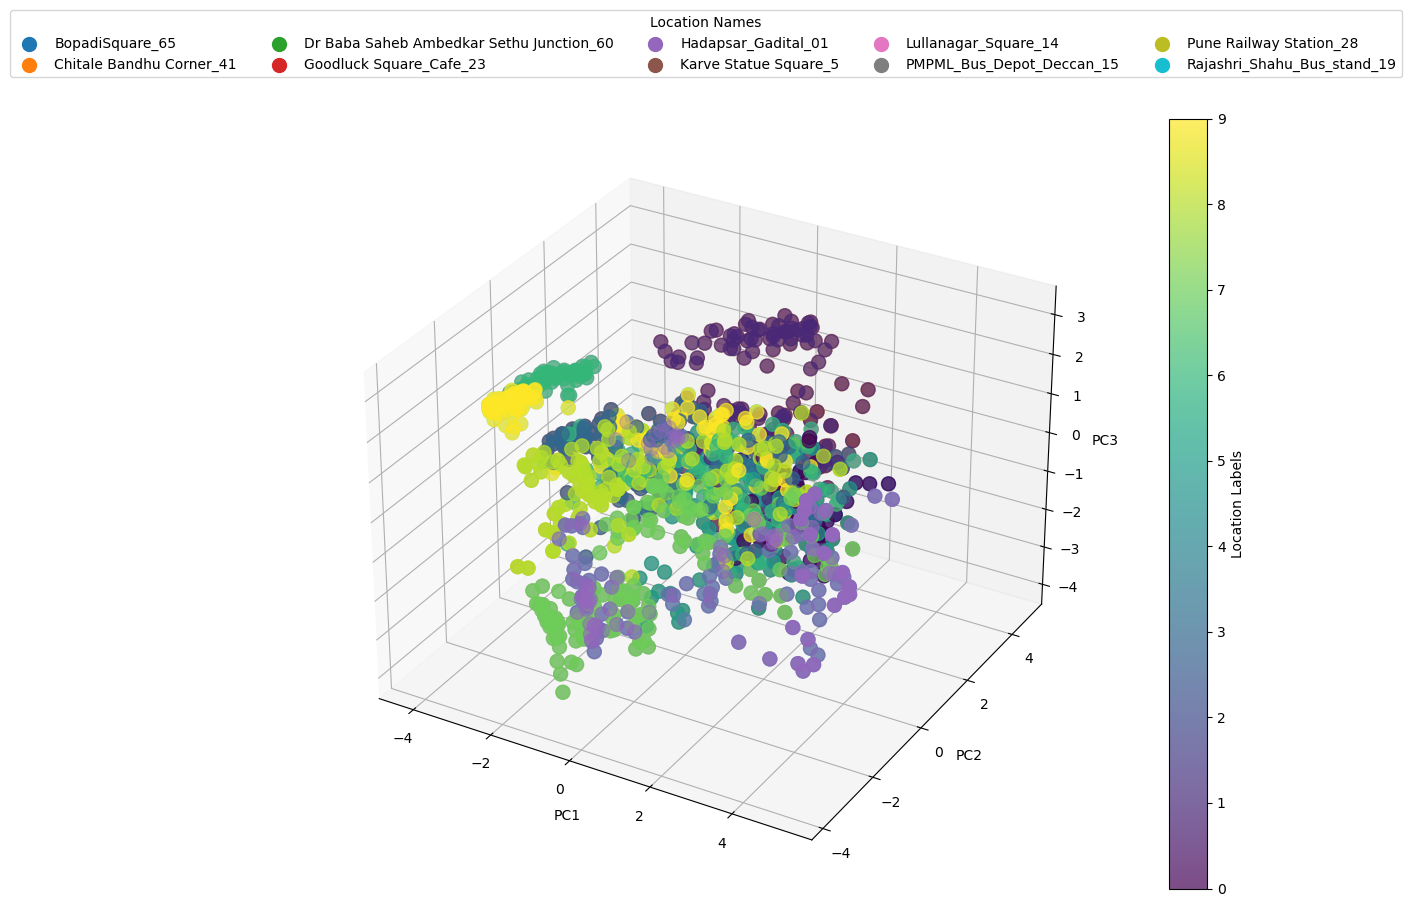

In [ ]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

# location names to numerical labels
label_encoder = LabelEncoder()
res['Label'] = label_encoder.fit_transform(res['Y'])

# 3D Scatter Plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(res['PC1'], res['PC2'], res['PC3'], c=res['Label'], s=100, alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend for each location
legend_handles = []
for label in label_encoder.classes_:
    indices = res['Y'] == label
    handle = ax.scatter(res.loc[indices, 'PC1'], res.loc[indices, 'PC2'], res.loc[indices, 'PC3'], label=label, s=100)
    legend_handles.append(handle)

ax.legend(handles=legend_handles, title='Location Names', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
colorbar = fig.colorbar(scatter, ax=ax, label='Location Labels')
fig.canvas.draw()

plt.savefig("kmeans_AQI_PCA_3D.png", format="png")
plt.show()


In [ ]:
#lets apply PCA with n_components = 12
pca = PCA(n_components=12)
%timeit pca.fit(X_standardized)

print(pca.components_) 

353 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[[ 4.07875917e-01  4.06663187e-01  4.12292094e-01  4.14194973e-01
   2.91733644e-01  3.39360765e-01  1.44651990e-02  7.48010920e-02
   1.17880259e-01  1.68147205e-01  2.11643939e-01  1.83518266e-01]
 [ 9.34178810e-02  5.55224191e-02  8.38570644e-02  5.00089315e-02
   1.39722004e-01  1.54233869e-02  5.04274549e-01  5.18749275e-01
  -1.04989161e-01 -9.24496471e-02 -4.53738237e-01 -4.58318297e-01]
 [-2.19657494e-01 -2.33763493e-01 -2.20325409e-01 -2.31585502e-01
   3.63721941e-01  1.87625111e-01  1.92845819e-01  1.92946669e-01
   5.24794765e-01  5.09997537e-01  8.87400131e-02  9.81504058e-02]
 [-1.33083494e-01 -1.07695224e-01 -1.23730898e-01 -9.91073306e-02
   1.45519014e-01  1.73351202e-01  3.67405695e-01  2.85584769e-01
  -3.81658509e-01 -3.87286048e-01  4.24056196e-01  4.49788326e-01]
 [ 1.57155469e-01  2.01262995e-01  5.77023267e-04  6.42809219e-02
  -3.90570517e-01 -6.51025760e-01  3.16527176e-01  2.29686232e-01

In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[0:3]))

[3.99663484e-01 2.27115759e-01 1.96467338e-01 7.56915759e-02
 5.26990591e-02 1.68425217e-02 1.53850651e-02 5.78516060e-03
 4.57282539e-03 3.95862251e-03 1.59255613e-03 2.26032117e-04]
0.8232465814888812


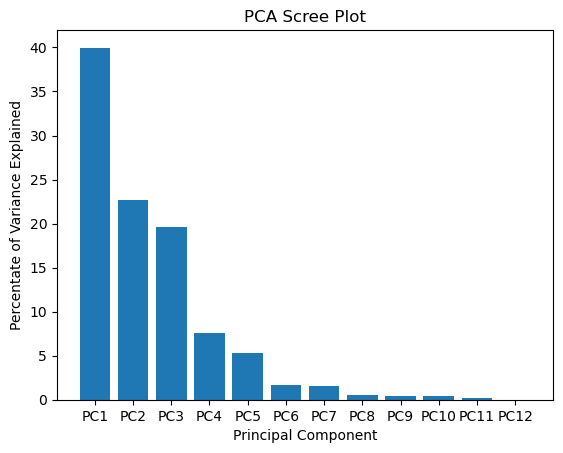

In [ ]:
#lets visualize the explained variance ratio. 
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
plt.bar(x= range(1,13), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

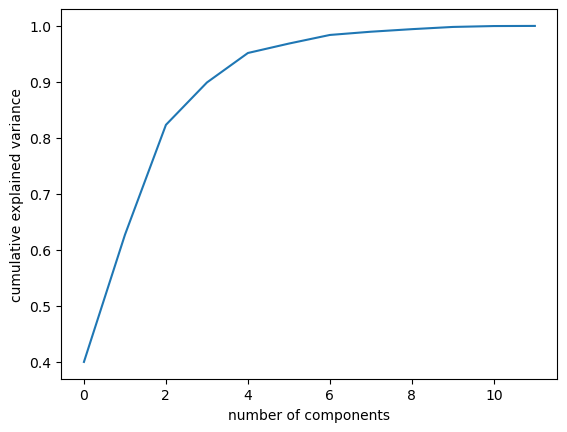

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# MDS

In [ ]:
# df_AQI is already defined
mds = MDS(n_components=3, random_state=42)
%time reduced_features = mds.fit_transform(X)


C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


CPU times: total: 1min 4s
Wall time: 31.9 s


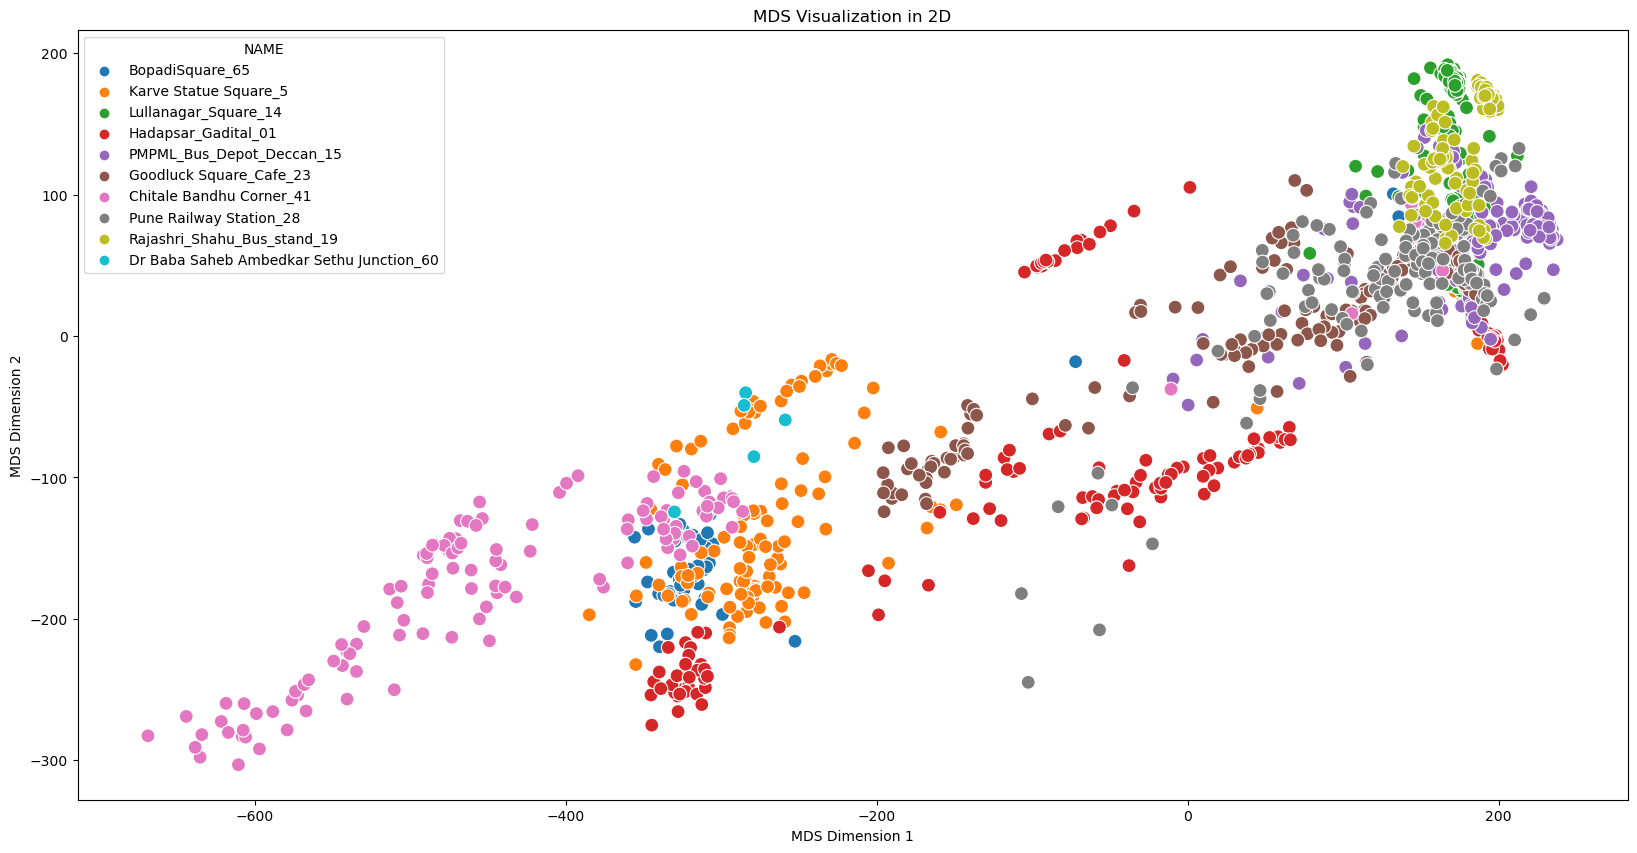

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df5["NAME"], s=100)
plt.title('MDS Visualization in 2D')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.savefig("MDS_AQI_visual.png", format="png")
plt.show()

## Locations of Pune Smart City Based on Similar Air Quality

In [ ]:
# These already has been called in above section
## air pollutants
# AQI_features = ['PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 
#                     'CO_MAX', 'CO_MIN', 'CO2_MAX', 'CO2_MIN', 
#                     'SO2_MIN', 'SO2_MAX', 'NO2_MAX', 'NO2_MIN']

# df_AQI = df5[AQI_features_max]
# X = df_AQI.values
# # df_AQI_scaled = (df_AQI - df_AQI.mean()) / df_AQI.std()
# df_AQI_scaled.describe()

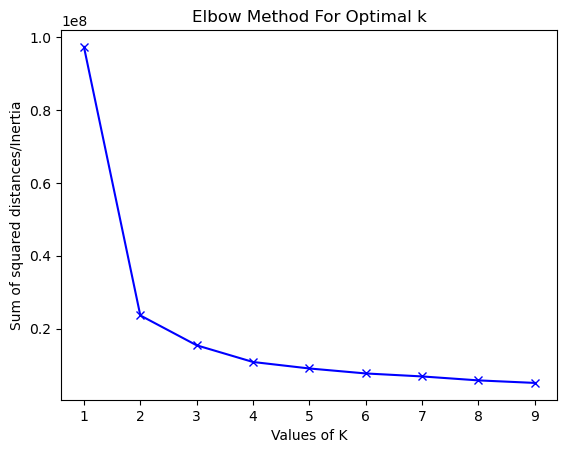

In [ ]:
# Elbow method
squared_distances_sum = []
K = range(1, 10)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(df_AQI)
    squared_distances_sum.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(K, squared_distances_sum, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.savefig("elbow_for_optimal_k_AQI.png", format="png")
plt.show()

In [ ]:
# Applying KMeans clustering to the reduced features
%time
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df5['cluster_MDS_KMeans'] = kmeans.fit_predict(reduced_features)

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


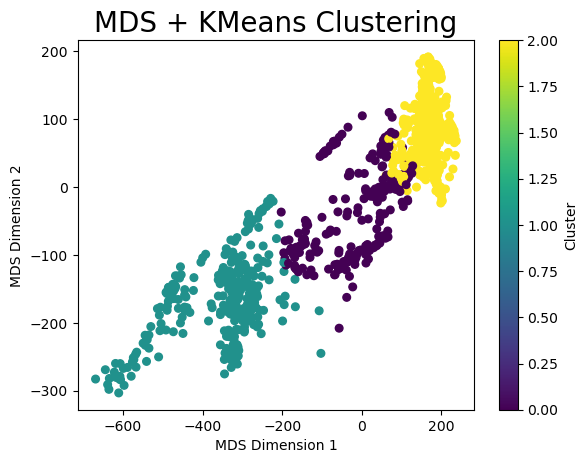

In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df5['cluster_MDS_KMeans'], cmap='viridis', s=30)
plt.title('MDS + KMeans Clustering', size=20)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.colorbar(label='Cluster')
plt.savefig("kmeans_with_MDS_2D.png", format="png")
plt.show()


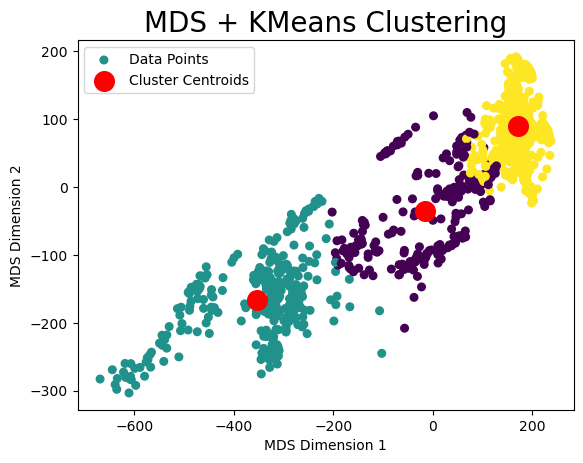

In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df5['cluster_MDS_KMeans'], cmap='viridis', s=30, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=200, label='Cluster Centroids')
plt.title('MDS + KMeans Clustering', size=20)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend()
plt.savefig("kmeans_with_MDS_2D_with_centroid.png", format="png")
plt.show()


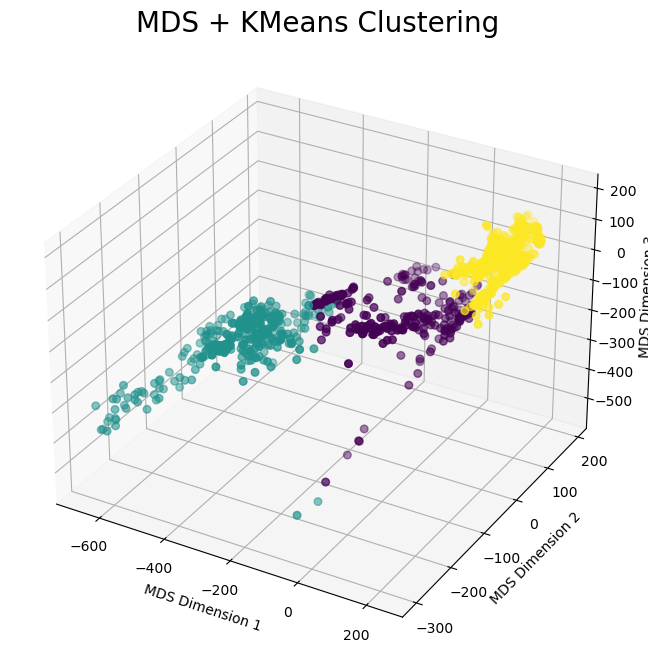

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=df5['cluster_MDS_KMeans'], cmap='viridis', s=30)
ax.set_title('MDS + KMeans Clustering', size=20)
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
plt.savefig("kmeans_with_MDS_3D.png", format="png")
plt.show()


# K-Means  without MDS

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


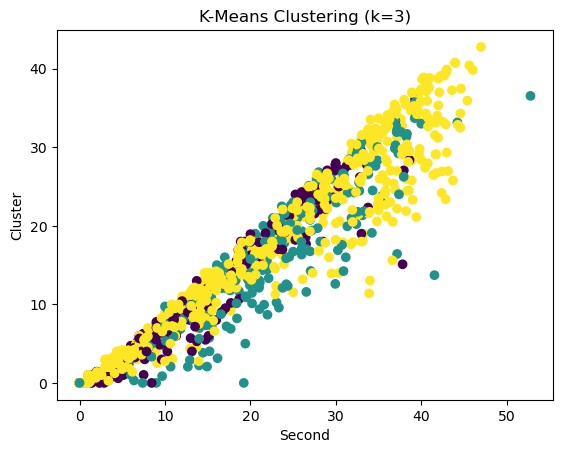

In [ ]:
n_clusters = 3


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df5['cluster'] = kmeans.fit_predict(X)


# Plot the clusters
plt.scatter(df5['PM10_MAX'], df5['PM10_MIN'], c=df5['cluster'], cmap='viridis')
plt.xlabel('Second')
plt.ylabel('Cluster')
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.savefig("kmeans_without_MDS_2D.png", format="png")
plt.show()

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


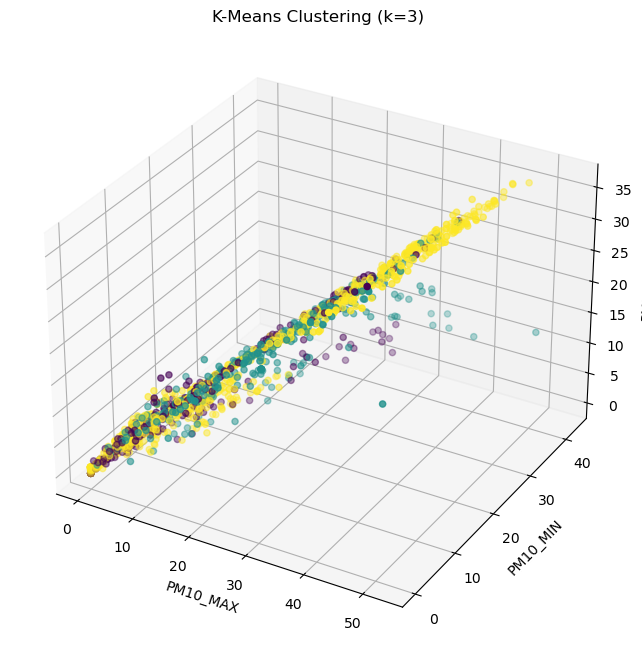

In [ ]:
n_clusters = 3

# clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df5['cluster'] = kmeans.fit_predict(df_AQI)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df5['PM10_MAX'], df5['PM10_MIN'], df5['PM2_MAX'], c=df5['cluster'], cmap='viridis')

ax.set_xlabel('PM10_MAX')
ax.set_ylabel('PM10_MIN')
ax.set_zlabel('PM2_MAX')
ax.set_title(f'K-Means Clustering (k={n_clusters})')
plt.savefig("kmeans_without_MDS_3D.png", format="png")
plt.show()


# Spectral Clustering

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-p

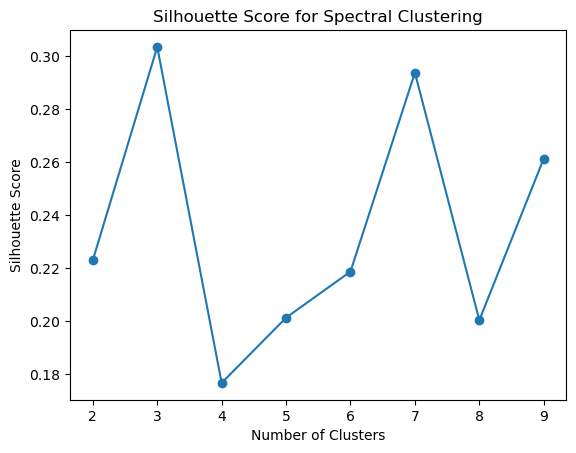

In [ ]:
df_spectral = df_AQI # df_AQI is already created

# Log-transformation
df_spectral_log = np.log1p(df_spectral)  # Avoiding issues with zero values, if any

# Standardize the log-transformed data
X_spectral_log = StandardScaler().fit_transform(df_spectral_log)

# Silhouette scores for different numbers of clusters
n_clusters_range = range(2, 10)
silhouette_scores = []

for n_clusters in n_clusters_range:
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(X_spectral_log)
    silhouette_scores.append(silhouette_score(X_spectral_log, labels))

# Plot the silhouette scores
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Spectral Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.savefig("soulhette's score.png", format="png")
plt.show()


Silhoutte's score is maximum for four clusters.

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


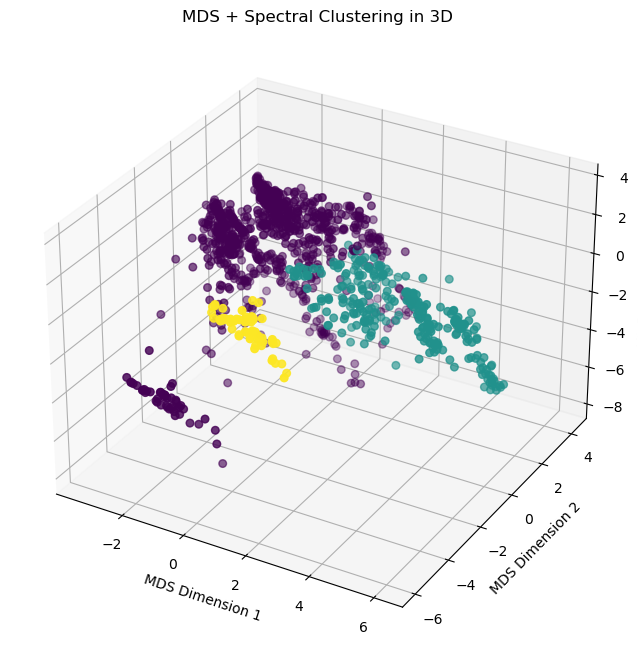

In [ ]:
# MDS
mds_spectral = MDS(n_components=3, random_state=42)
reduced_features_spectral = mds_spectral.fit_transform(X_spectral_log)

# spectral clustering
n_clusters_spectral =  3 #number of clusters
spectral = SpectralClustering(n_clusters=n_clusters_spectral, affinity='nearest_neighbors', random_state=42)
df_spectral['spectral_cluster'] = spectral.fit_predict(X_spectral_log)

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features_spectral[:, 0], reduced_features_spectral[:, 1], reduced_features_spectral[:, 2],
           c=df_spectral['spectral_cluster'], cmap='viridis', s=30)
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
ax.set_title('MDS + Spectral Clustering in 3D')
plt.savefig("spectrul_clustering_3D.png", format="png")
plt.show()


#                                                END